## Technical Task for Data Scientist

The dataset contains medical information about patients and their health. The task is to predict
the likelihood of a stroke based on various factors.



In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.  Exploratory Data Analysis (EDA)
   ### • Import data from train.csv, test.csv, and gender_submission.csv files.


In [218]:
# Import csv file

df= pd.read_csv('./data.csv')

In [219]:
# The first 5 rows in the Data Frame

df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [220]:
# The last 5 rows in the Data Frame

df.tail(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [221]:
# Size of DataFrame

df.shape

(5110, 12)

In [222]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [223]:
# Information about df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [224]:
df.describe(include='all').fillna(0)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,0.000000,3,0.000000,0.000000,0.000000,2,5,2,0.000000,0.000000,4,0.000000
top,0.000000,Female,0.000000,0.000000,0.000000,Yes,Private,Urban,0.000000,0.000000,never smoked,0.000000
freq,0.000000,2994,0.000000,0.000000,0.000000,3353,2925,2596,0.000000,0.000000,1892,0.000000
mean,36517.829354,0,43.226614,0.097456,0.054012,0,0,0,106.147677,28.893237,0,0.048728
std,21161.721625,0,22.612647,0.296607,0.226063,0,0,0,45.283560,7.854067,0,0.215320
min,67.000000,0,0.080000,0.000000,0.000000,0,0,0,55.120000,10.300000,0,0.000000
25%,17741.250000,0,25.000000,0.000000,0.000000,0,0,0,77.245000,23.500000,0,0.000000
50%,36932.000000,0,45.000000,0.000000,0.000000,0,0,0,91.885000,28.100000,0,0.000000
75%,54682.000000,0,61.000000,0.000000,0.000000,0,0,0,114.090000,33.100000,0,0.000000


In [225]:
# types in data

df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [226]:
# How many NaN values ​​are there in the data?
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### Working with NaN
"Here, the values for gender, presence of hypertension, presence of heart disease, whether the patient has ever been married, type of work, and type of residence were separated from the overall Body Mass Index, and their respective average values were calculated."


In [227]:
def fill_bmi ():
    try:
        for i in range(df.shape[0]):
            # Those with NaN values ​​were removed.
            bmi_isna = df.bmi.isna()
            # NaN values ​​were replaced one by one
            if bmi_isna[i]:
                df.loc[i,'bmi']= df[(df.gender==df.gender.loc[i])|
                    (df.hypertension==df.hypertension.loc[i])|
                    (df.heart_disease==df.heart_disease.loc[i])|
                    (df.ever_married==df.ever_married.loc[i])|
                    (df.work_type==df.work_type.loc[i])|
                    (df.Residence_type==df.Residence_type.loc[i])
                ]['bmi'].mean()
    except:
        # If there is any error, an error message will appear on the screen.
        return  print("Erorr")

fill_bmi()

In [228]:
# Checking for NaNs
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

As a result, there are no NaN values ​​left in the Data frame. Let's move on to the next step.

In [229]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [230]:
df.groupby("stroke",)['gender'].value_counts()

stroke  gender
0       Female    2853
        Male      2007
        Other        1
1       Female     141
        Male       108
Name: count, dtype: int64

In [231]:
# from scipy.stats import norm

# age_mean = df[df.stroke==1].age.to_numpy().mean()
# age_std= df[df.stroke==1].age.to_numpy().std()

# x=np.linspace(age_mean-4*age_std,age_mean+4*age_std,1000)
# y= norm(loc=age_mean,scale=age_std).pdf()

# plt.plot(x,y,c="blue")
# plt.show()


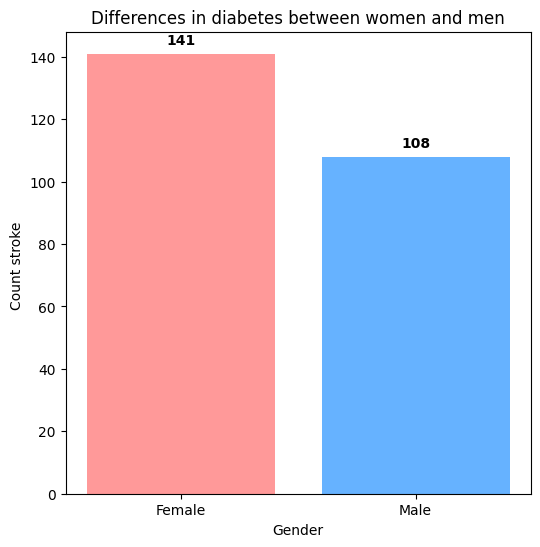

In [232]:
count_gender_stroke= df[df.stroke==1].gender.value_counts().to_numpy()

plt.figure(figsize=(6, 6))
plt.bar(['Female','Male'], count_gender_stroke,color=['#FF9999','#66B2FF'])

for i, v in enumerate(count_gender_stroke):
    plt.text(i, v + 3, str(v), ha='center', fontsize=10, fontweight='bold')

plt.xlabel('Gender')
plt.ylabel('Count stroke ')
plt.title('Differences in diabetes between women and men')
plt.show()

In [233]:
residence_type_Urban_caount=df[(df.Residence_type=='Urban')&(df.stroke==1)].Residence_type.count()
residence_type_Rural_caount=df[(df.Residence_type=='Rural')&(df.stroke==1)].Residence_type.count()

ever_married_Yes_caount=df[(df.ever_married=='Yes')&(df.stroke==1)].ever_married.count()
ever_married_No_caount=df[(df.ever_married=='No')&(df.stroke==1)].ever_married.count()

hypertension_yes_caount=df[(df.hypertension==1)&(df.stroke==1)].hypertension.count()
hypertension_no_caount=df[(df.hypertension==0)&(df.stroke==1)].hypertension.count()


heart_disease_yes_caount=df[(df.heart_disease==1)&(df.stroke==1)].heart_disease.count()
heart_disease_no_caount=df[(df.heart_disease==0)&(df.stroke==1)].heart_disease.count()


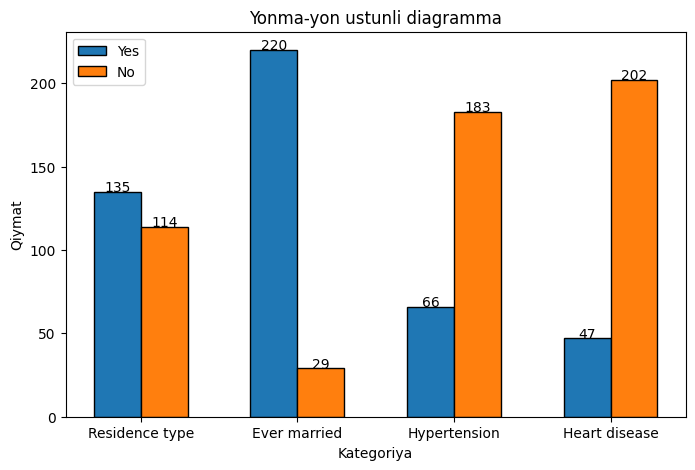

In [234]:
import numpy as np
import matplotlib.pyplot as plt

# Ma'lumotlar

labels = ['Residence type','Ever married','Hypertension','Heart disease']
x_labels = np.arange(len(labels))

values1 = np.array([residence_type_Urban_caount,ever_married_Yes_caount,hypertension_yes_caount,heart_disease_yes_caount])  # To'q rang (Orange)
values2 = np.array([residence_type_Rural_caount,ever_married_No_caount,hypertension_no_caount,heart_disease_no_caount])  # Och rang (Yellow)

# Ustunlarning eni
width = 0.3

# Grafikni chizish
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x_labels - width/2, values1, width, color='#1F77B4', edgecolor='black', label='Yes') ##66FFFF
ax.bar(x_labels + width/2, values2, width, color='#FF7F0E', edgecolor='black', label='No')  ##33FF99
for i in range(len(x_labels)):
    ax.text(x_labels[i] - width/2, values1[i] + 0.1, str(values1[i]), ha='center', fontsize=10)
    ax.text(x_labels[i] + width/2, values2[i] + 0.1, str(values2[i]), ha='center', fontsize=10)

# O'q va belgilashlar
ax.set_xlabel("Kategoriya")
ax.set_ylabel("Qiymat")
ax.set_title("Yonma-yon ustunli diagramma")
ax.set_xticks(x_labels)
ax.set_xticklabels(labels)
ax.legend()

# Grafikni ko'rsatish
plt.show()




In [235]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [236]:
def plot_segment_distibution(df,segment_columns, test_factor,y_faktor):
    for segment in segment_columns:
        aggregated_data= df.groupby(by=[test_factor,segment]).avg_glucose_level.sum().reset_index()
        sns.catplot(x=segment, y=y_faktor, hue=test_factor, data=aggregated_data, kind='bar', height=4, aspect=1.5)

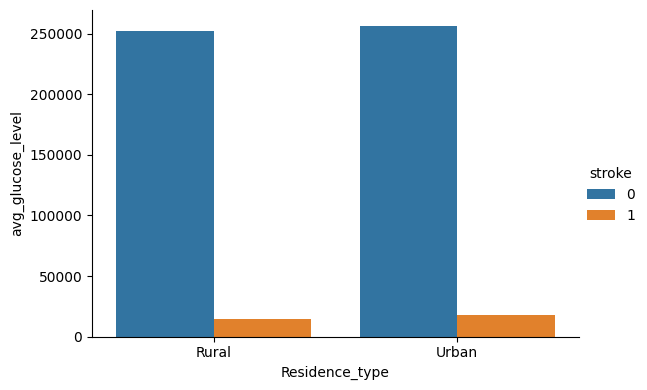

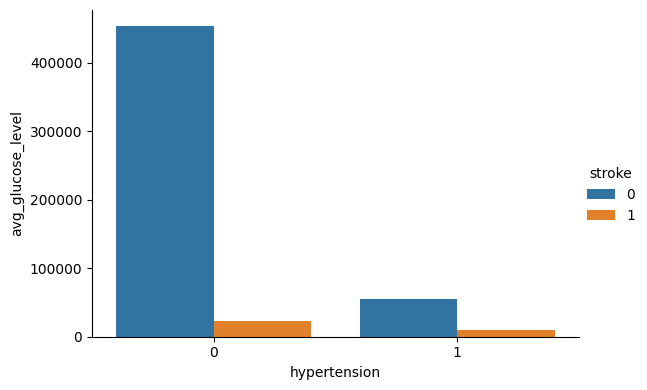

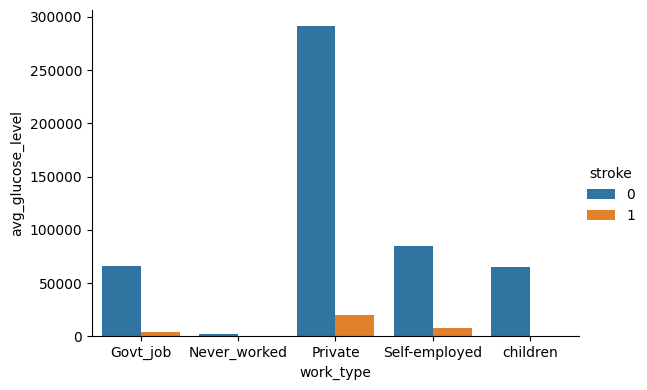

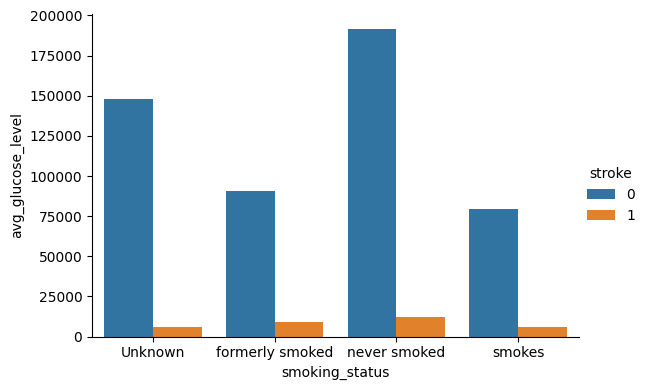

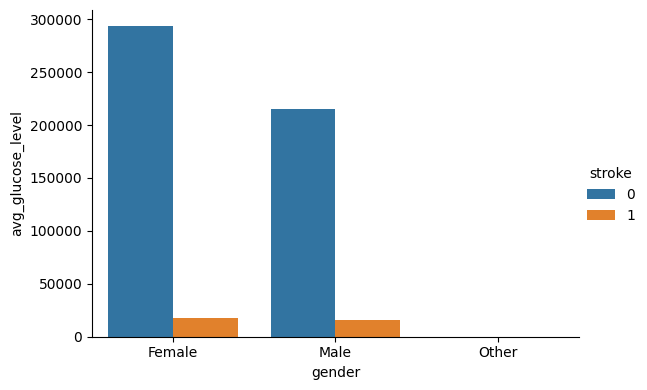

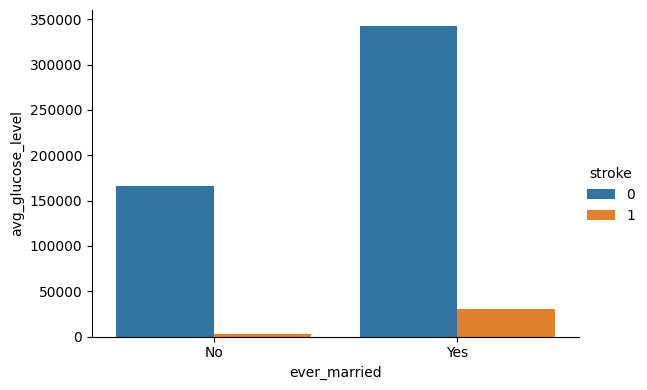

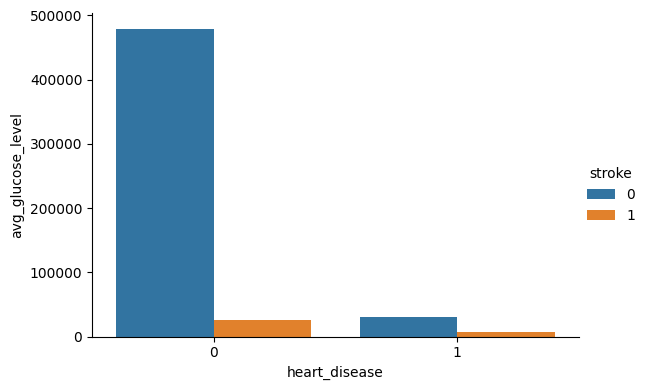

In [237]:
plot_segment_distibution(df,['Residence_type' ,'hypertension','work_type','smoking_status','gender','ever_married','heart_disease'],'stroke',"avg_glucose_level")

In [238]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Ma'lumotlar



# labels = ['Gender' ,'Female', 'C', 'D', 'E', 'F', 'G', 'H']
# values1 = [5, 10, 15, 20, 10, 8, 6, 4]
# values2 = [15, 13, 10, 8, 6, 5, 3, 4]
# # values3 = [10, 12, 14, 16, 18, 20, 22, 24]

# # Ustunlar orasidagi masofa
# x = np.arange(len(labels))
# width = 0.25  # Ustunlarning eni

# # Grafikni chizish
# fig, ax = plt.subplots(figsize=(8, 6))
# ax.bar(x - width, values1, width, label='Kategoriya 1', color='blue')
# ax.bar(x, values2, width, label='Kategoriya 2', color='red')
# # ax.bar(x + width, values3, width, label='Kategoriya 3', color='green')

# # O'q va belgilashlar
# ax.set_xlabel('Kategoriya')
# ax.set_ylabel('Qiymatlar')
# ax.set_title('Guruhlangan ustunli diagramma')
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.legend()

# # Grafikni ko'rsatish
# plt.show()

In [239]:



# count_gender_stroke= df[df.stroke==1].Residence_type.value_counts().to_numpy()

# plt.figure(figsize=(6, 6))
# plt.bar(['Urban','Rural'], count_gender_stroke,)

# for i, v in enumerate(count_gender_stroke):
#     plt.text(i, v + 3, str(v), ha='center', fontsize=10, fontweight='bold')

# plt.xlabel('Gender')
# plt.ylabel('Count stroke ')
# plt.title('Differences in diabetes between women and men')
# plt.show()

In [240]:
# count_gender_stroke= df[df.stroke==1].ever_married.value_counts().to_numpy()

# plt.figure(figsize=(6, 6))
# plt.bar(['Married','Not married'], count_gender_stroke,)

# for i, v in enumerate(count_gender_stroke):
#     plt.text(i, v + 3, str(v), ha='center', fontsize=10, fontweight='bold')

# plt.xlabel('Gender')
# plt.ylabel('Count stroke ')
# plt.title('Differences in diabetes between women and men')
# plt.show()

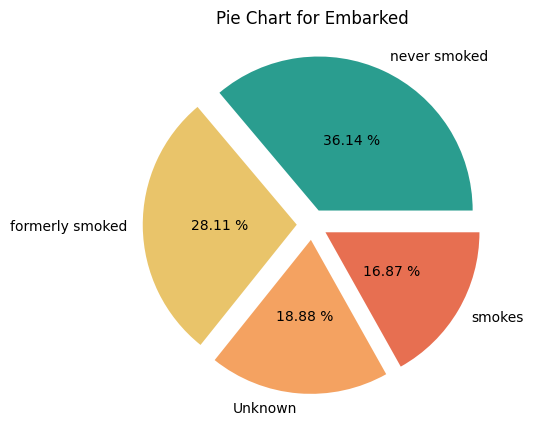

(['never smoked', 'formerly smoked', 'Unknown', 'smokes'],
 smoking_status
 never smoked       90
 formerly smoked    70
 Unknown            47
 smokes             42
 Name: count, dtype: int64)

In [241]:
smoking_status=['never smoked','formerly smoked', 'Unknown' ,'smokes' ]
smoking_status_caunt =df[df.stroke==1].smoking_status.value_counts().to_numpy()

plt.figure(figsize=(7,5),dpi=100)
plt.pie(smoking_status_caunt, labels=smoking_status, autopct='%.2f %%',colors=['#2A9D8F','#E9C46A','#F4A261','#E76F51'] ,pctdistance=0.5,explode=[.1,.1,.1,.1])
plt.title('Pie Chart for Embarked')

plt.show()
smoking_status,df[df.stroke==1].smoking_status.value_counts()

<Axes: xlabel='age', ylabel='avg_glucose_level'>

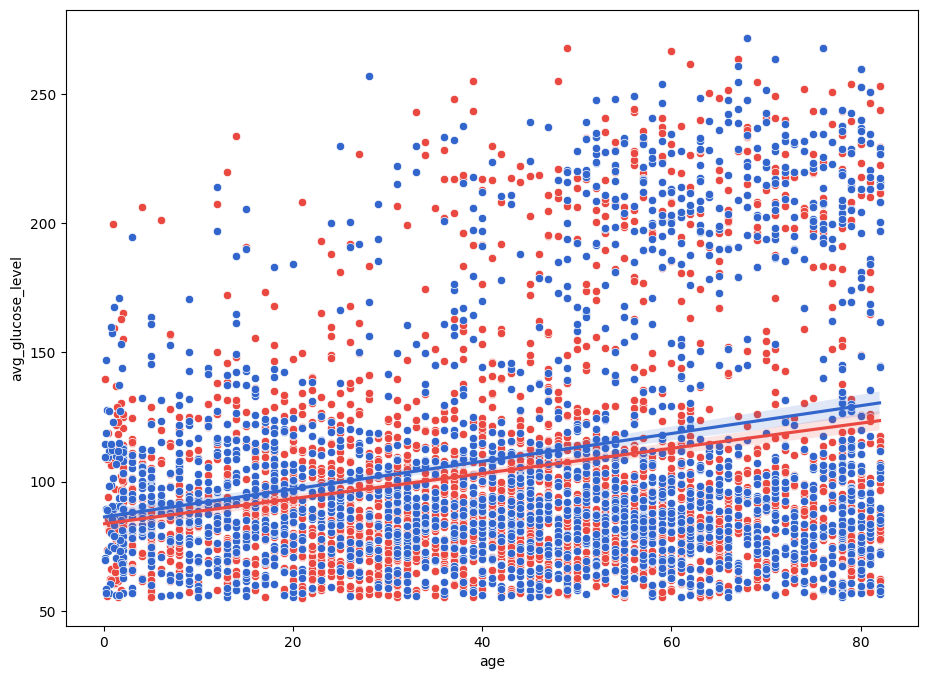

In [242]:
plt.figure(figsize=(11, 8))

sns.scatterplot(x=df[(df.stroke==1)|(df.gender=='Female')].age, y=df[(df.stroke==1)|(df.gender=='Female')].avg_glucose_level,color='#e94941')
sns.scatterplot(x=df[(df.stroke==1)|(df.gender=='Male')].age, y=df[(df.stroke==1)|(df.gender=='Male')].avg_glucose_level,color='#3366cc')


sns.regplot(data=df[(df.stroke==1)|(df.gender=='Female')], x='age', y='avg_glucose_level', scatter=False,color='#e94941')
sns.regplot(data=df[(df.stroke==1)|(df.gender=='Male')], x='age', y='avg_glucose_level', scatter=False,color='#3366cc')

<Axes: xlabel='bmi', ylabel='avg_glucose_level'>

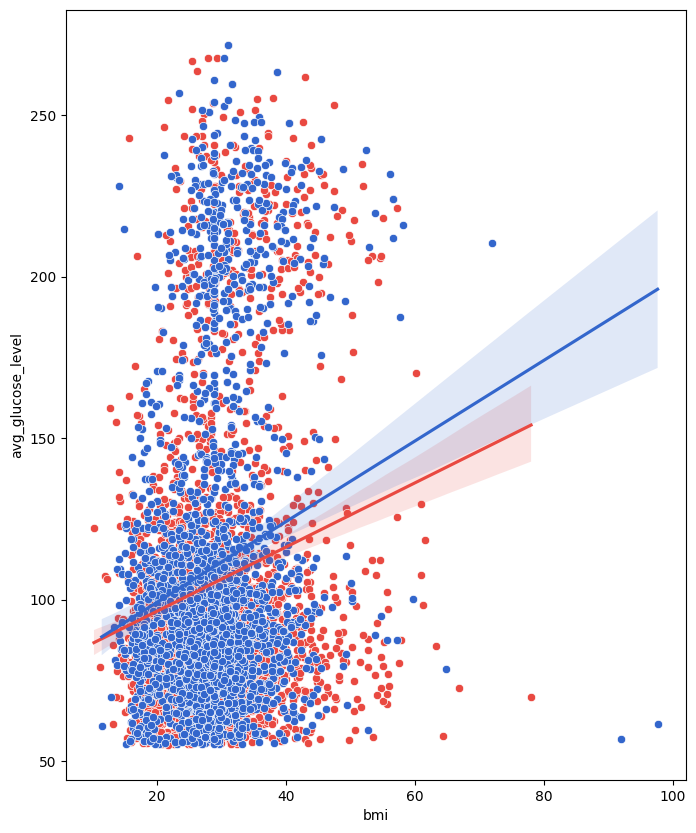

In [243]:
plt.figure(figsize=(8, 10))

sns.scatterplot(x=df[(df.stroke==1)|(df.gender=='Female')].bmi, y=df[(df.stroke==1)|(df.gender=='Female')].avg_glucose_level,color='#e94941')
sns.scatterplot(x=df[(df.stroke==1)|(df.gender=='Male')].bmi, y=df[(df.stroke==1)|(df.gender=='Male')].avg_glucose_level,color='#3366cc')

sns.regplot(data=df[(df.stroke==1)|(df.gender=='Female')], x='bmi', y='avg_glucose_level', scatter=False,color='#e94941')
sns.regplot(data=df[(df.stroke==1)|(df.gender=='Male')], x='bmi', y='avg_glucose_level', scatter=False,color='#3366cc')

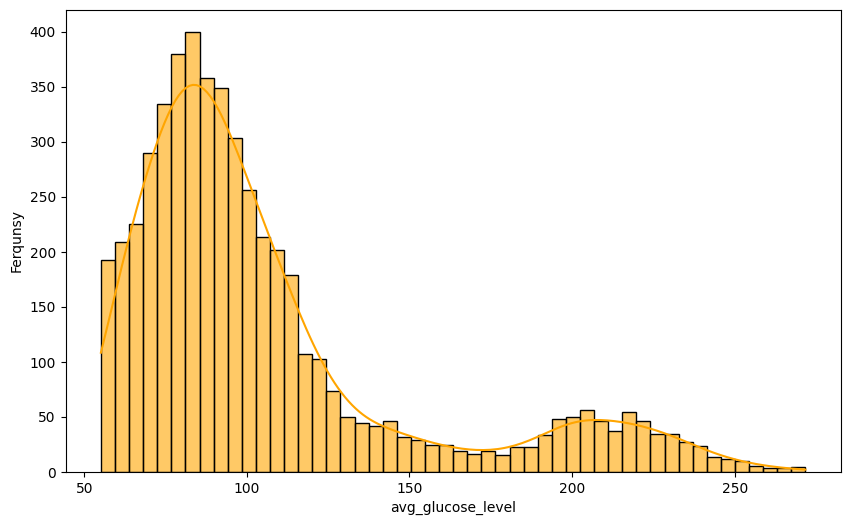

In [244]:


plt.figure(figsize=(10, 6))
sns.histplot(df.avg_glucose_level, bins=50, kde=True, color="orange", edgecolor="black", alpha=0.6)
plt.ylabel('Ferqunsy')


plt.show()

In [245]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [246]:
df.id.duplicated().value_counts()

id
False    5110
Name: count, dtype: int64

In [247]:
df.groupby(['stroke','Residence_type','gender','work_type'])['id'].value_counts()

stroke  Residence_type  gender  work_type      id   
0       Rural           Female  Govt_job       742      1
                                               1116     1
                                               1192     1
                                               1231     1
                                               1246     1
                                                       ..
1       Urban           Male    Self-employed  42117    1
                                               42899    1
                                               54401    1
                                               54827    1
                                               58631    1
Name: count, Length: 5110, dtype: int64

## Feature Engineering

digitize the gender of users in the data.

In [248]:
df.gender.unique()


array(['Male', 'Female', 'Other'], dtype=object)

I'm going to delete it because I don't use another gender.

In [249]:
# index of the desired row
drop_index = df[df.gender=='Other'].index[0]

# unnecessary row deleted
df = df.drop([drop_index])


In [250]:
df.gender.unique()

array(['Male', 'Female'], dtype=object)

In [251]:
df.gender= df.gender.apply(lambda gender : 1 if(gender=='Male') else 0 )

In [252]:
df.hypertension.unique()

array([0, 1])

In [253]:
df.heart_disease.unique()

array([1, 0])

In [254]:
df.ever_married.unique()

array(['Yes', 'No'], dtype=object)

In [255]:
df.ever_married= df.ever_married.apply(lambda married: 1 if(married=='Yes') else 0)

In [256]:
df.ever_married.unique()

array([1, 0])

In [257]:
work_type =df.work_type.unique()
work_type

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [258]:
df.work_type= df.work_type.apply(lambda type: np.where(work_type == type)[0][0] )

In [259]:
df.work_type.unique()

array([0, 1, 2, 3, 4])

In [260]:
df.Residence_type.unique()

array(['Urban', 'Rural'], dtype=object)

In [261]:
df.Residence_type=df.Residence_type.apply(lambda type: 1 if(type =='Urban') else 0)


In [262]:
df.Residence_type.unique()

array([1, 0])

In [263]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [264]:
smoking_status = df.smoking_status.unique()
smoking_status

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [265]:
df.smoking_status= df.smoking_status.apply(lambda type: np.where(smoking_status == type)[0][0] )

In [266]:
df.smoking_status.unique()

array([0, 1, 2, 3])

In [267]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,0,1,228.69,36.600000,0,1
1,51676,0,61.0,0,0,1,1,0,202.21,28.893237,1,1
2,31112,1,80.0,0,1,1,0,0,105.92,32.500000,1,1
3,60182,0,49.0,0,0,1,0,1,171.23,34.400000,2,1
4,1665,0,79.0,1,0,1,1,0,174.12,24.000000,1,1


In [275]:
df[(df.age<=30)&(df.stroke==1)].age.count()

np.int64(2)

In [276]:
df=df[(df.age>30)]

In [280]:
from scipy import stats

# Tasavvur qiling, A va B guruhlarining o'rtacha qiymatlari farq qiladimi?
group_A = df[df['stroke'] == 1]['hypertension']
group_B = df[df['stroke'] == 0]['hypertension']

# t-testni bajarish
t_stat, p_value = stats.ttest_ind(group_A, group_B)

print(f"T-statistika: {t_stat}, P-qiymat: {p_value}")

# Natijani tahlil qilish
if p_value < 0.05:
    print("Guruhlar o'rtasidagi farq statistik jihatdan ahamiyatli!")
else:
    print("Farq ahamiyatli emas.")

T-statistika: 6.16384142964366, P-qiymat: 7.898434964132496e-10
Guruhlar o'rtasidagi farq statistik jihatdan ahamiyatli!


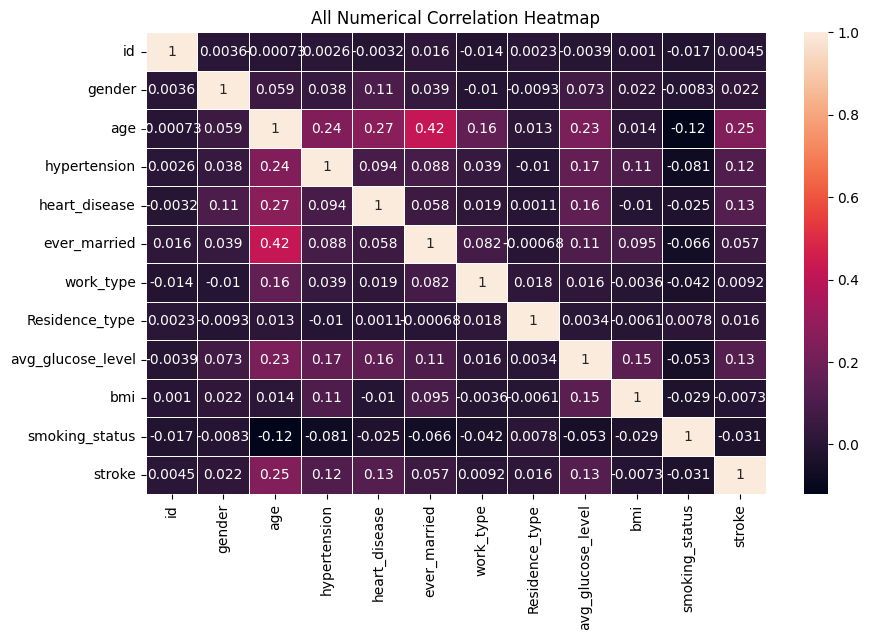

In [ ]:
df_corrr = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(df_corrr,annot=True, linewidths=0.5)
plt.title('All Numerical Correlation Heatmap')
plt.show()

In [ ]:
df = df.drop(columns=['id'])



In [ ]:

# df[df.age<1]

In [281]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

# Копирование из dataFrame
df_boost_prepared = df.copy()

# Данные были разделены на две части: x и y.
xb = df_boost_prepared.drop(['stroke'], axis=1)
yb =  df_boost_prepared['stroke']

# Разделяем на train/test
xb_train, xb_test, yb_train, yb_test = train_test_split(xb,yb, random_state=42, test_size=0.3)

xgb = XGBClassifier()

# обучения модель 
xgb.fit(xb_train, yb_train)
yb_pred = xgb.predict(xb_test)

# точность модели
print("XGBoost Accuracy:", accuracy_score(yb_test, yb_pred))

XGBoost Accuracy: 0.911487758945386
